# EDA and Visualizations- Part 2

Author: Harry Zhou

Contact: haininzhou@gmail.com

Date: 2023-06-25

# Introduction

Sience we have got a clean dataset from Part1, We can then begin exploring the data itself to build initial intuition about the trends contained within the data that could help us answer further questions or guide us other downstream tasks such as modeling. 

## Content

   [1.Summary statistics](#)

   [2.Plots](#)
   
   [3.Looking at univariate and bivariate distributions](#)
   
   
  - Data Preprocessing
  
  - Category variables
  
  - Correlations with Target
  
  - Correlated variables analysis
  
  
  - Univariate Analysis
  
  - Bivariative Analysis
  


## Data Loading 

In [1]:
# importing packages to be used later
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Filter the warnings.
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes_health_indicators_BRFSS2021.csv")

df.head()

,Diabetes_012,Age,Sex,Education,Income,HighBP,CholCheck,HighChol,BMI,Smoker,...,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Blind
0,0,11,0,4,5,0,1,1,1,1,...,1,1,0,1,0,5,10,20,0,0
1,2,11,0,4,3,1,1,0,3,0,...,1,0,0,1,0,2,0,0,0,0
2,2,9,0,4,7,1,1,1,4,0,...,1,1,0,1,0,2,10,0,0,0
3,0,13,1,5,6,0,1,0,2,1,...,0,0,0,1,0,3,0,0,1,0
4,0,10,0,4,8,1,1,0,4,1,...,1,1,0,1,0,3,5,25,1,0


In [3]:
df.sample(15)

,Diabetes_012,Age,Sex,Education,Income,HighBP,CholCheck,HighChol,BMI,Smoker,...,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Blind
182178,0,5,0,4,6,0,1,0,3,0,...,1,1,0,1,0,2,3,0,0,0
45509,2,5,1,6,7,1,1,0,4,0,...,0,1,0,1,1,3,0,0,0,0
120527,0,6,0,6,11,0,1,0,3,0,...,0,1,0,1,0,2,4,0,0,0
78618,0,5,0,3,3,0,1,1,2,0,...,1,1,0,1,1,3,2,0,0,0
128396,2,7,0,5,5,1,1,1,4,0,...,0,1,0,1,0,3,0,2,0,0
192676,2,9,0,3,6,0,1,1,4,1,...,1,1,0,1,0,4,0,3,0,0
119393,0,11,1,5,3,1,1,0,3,1,...,0,1,0,1,1,4,30,0,1,1
32931,1,10,0,5,5,0,1,1,1,0,...,0,1,0,1,0,3,0,0,0,0
76023,0,12,1,6,9,1,1,1,4,1,...,0,1,0,1,0,3,0,0,0,0
202044,0,8,1,4,7,1,1,0,4,1,...,0,1,0,1,0,1,0,15,0,0


In [4]:
#This quick check seems to show that the data is loaded correctly now.
df.shape

(215258, 24)

We have 215258 rows and 24 columns, storing various types of information: all are numeric columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215258 entries, 0 to 215257
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          215258 non-null  int64
 1   Age                   215258 non-null  int64
 2   Sex                   215258 non-null  int64
 3   Education             215258 non-null  int64
 4   Income                215258 non-null  int64
 5   HighBP                215258 non-null  int64
 6   CholCheck             215258 non-null  int64
 7   HighChol              215258 non-null  int64
 8   BMI                   215258 non-null  int64
 9   Smoker                215258 non-null  int64
 10  Stroke                215258 non-null  int64
 11  HeartDiseaseorAttack  215258 non-null  int64
 12  HeartDisease          215258 non-null  int64
 13  PhysActivity          215258 non-null  int64
 14  Fruits                215258 non-null  int64
 15  Veggies               215258 non-n

In [6]:
# Checking unique values in different variables

unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()


,unique value count
Diabetes_012,3
Age,13
Sex,2
Education,6
Income,11
HighBP,2
CholCheck,2
HighChol,2
BMI,4
Smoker,2


In [7]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [8]:
v_counts(df)

0    175326
2     34106
1      5826
Name: Diabetes_012, dtype: int64
_____________________________________________________________________________
10    24781
9     24651
11    22773
8     21496
7     19030
6     16080
5     15600
12    15049
13    14735
4     14125
3     11753
2      8569
1      6616
Name: Age, dtype: int64
_____________________________________________________________________________
0    116536
1     98722
Name: Sex, dtype: int64
_____________________________________________________________________________
6    89992
5    62712
4    52034
3     7247
2     3087
1      186
Name: Education, dtype: int64
_____________________________________________________________________________
7     37990
6     30760
8     30324
9     29432
5     27107
4     13125
10    12707
11    11360
3      9163
2      7151
1      6139
Name: Income, dtype: int64
_____________________________________________________________________________
0    120410
1     94848
Name: HighBP, dtype: int64
_______

> * We have 213703 persons out of 253680 are Healthy; 35346 have diabetic and rest of 4631 have Pre-diabetic phase, so our problem is imbalanced.We will deal with it when modling.

In [9]:
# Counts How many have diabetes or not
countHealthy = len(df[df.Diabetes_012 == 0])
countHavePreDiabetic = len(df[df.Diabetes_012 == 1])
countDiabteic = len(df[df.Diabetes_012 == 2])
print("Percentage of Patients Are Healthy: {:.2f}%".format((countHealthy / (len(df.Diabetes_012))*100)))
print("Percentage of Patients Have Pre-Diabetic: {:.2f}%".format((countHavePreDiabetic / (len(df.Diabetes_012))*100)))
print("Percentage of Patients Have Diabetic: {:.2f}%".format((countDiabteic / (len(df.Diabetes_012))*100)))

Percentage of Patients Are Healthy: 81.45%
Percentage of Patients Have Pre-Diabetic: 2.71%
Percentage of Patients Have Diabetic: 15.84%


*  If we want to do binary classification of diabtes vs no diabetes that can be accomplished by either joining the prediabetics with the diabetics, with the non-diabetics, or removing them entirely. I would like to add them to the diabetic group, as being told by a doctor you are prediabetic is an indication of diabetes risk and ultimately we are interested in risk.

In [10]:
#Copy old table to new one.
brfss_binary = df
#Change the diabetics 2 to a 1 so that we have 0 meaning non-diabetic and pre-diabetic and 1 meaning diabetic.
brfss_binary['Diabetes_012'] = brfss_binary['Diabetes_012'].replace({2:1})

#Change the column name to Diabetes_binary
brfss_binary = brfss_binary.rename(columns = {'Diabetes_012': 'Diabetes_binary'})
brfss_binary.Diabetes_binary.unique()

array([0, 1], dtype=int64)

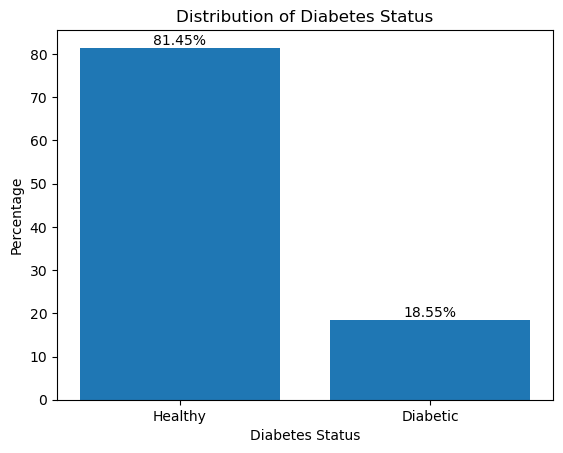

In [11]:
# Count how many have diabetes or not
countHealthy = len(brfss_binary[brfss_binary.Diabetes_binary == 0])
countDiabetic = len(brfss_binary[brfss_binary.Diabetes_binary == 1])

# Calculate percentages
totalPatients = len(brfss_binary)
percentageHealthy = (countHealthy / totalPatients) * 100
percentageDiabetic = (countDiabetic / totalPatients) * 100

# Create a bar chart
categories = ['Healthy','Diabetic']
percentages = [percentageHealthy, percentageDiabetic]

plt.bar(categories, percentages)
plt.xlabel('Diabetes Status')
plt.ylabel('Percentage')
plt.title('Distribution of Diabetes Status')

# Display the values on top of each bar
for i, value in enumerate(percentages):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

## Grouping variables

In [12]:
# grouped variables
target = 'Diabetes_binary'
bool_vars = (brfss_binary.nunique()[brfss_binary.nunique() == 2]
                .index
                .drop(labels='Diabetes_binary'))
num_vars = [var for var in brfss_binary.columns if var not in bool_vars and var != 'Diabetes_binary']

## EDA: Category variables

In [13]:
colors = ['#be4d25','#2596be']
def analyse_cat(var):
    (brfss_binary.groupby('Diabetes_binary')[var]
     .value_counts(1)
     .unstack()
     .iloc[:,::-1]
     .plot(kind='barh',stacked=True,figsize=(8, 2), color=colors, alpha=1)
     .spines[['top', 'right']].set_visible(False))
    plt.legend(['Yes', "No"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
    plt.tight_layout()
    plt.title(var, fontsize=16)
    plt.show()

### Quick check the *percentage* that represents each categorical variable for people **with** and **without diabetes**. 

Note: In variable Sex, yes=Male, No=Female

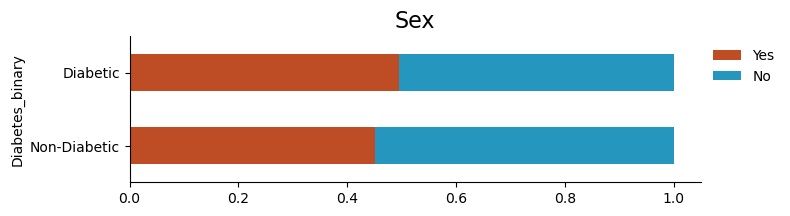

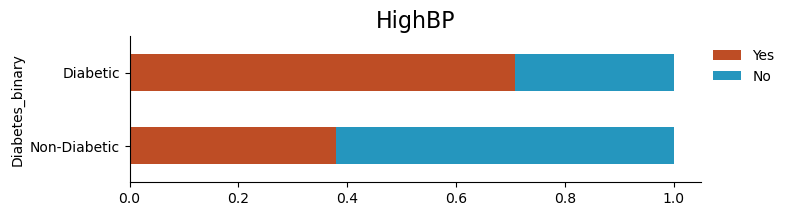

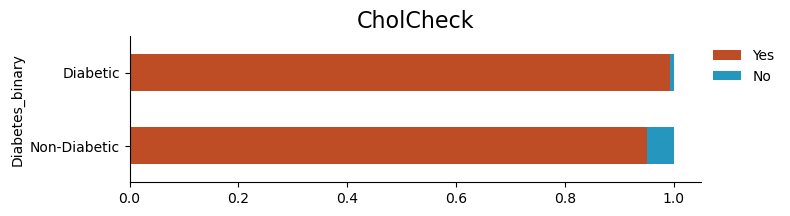

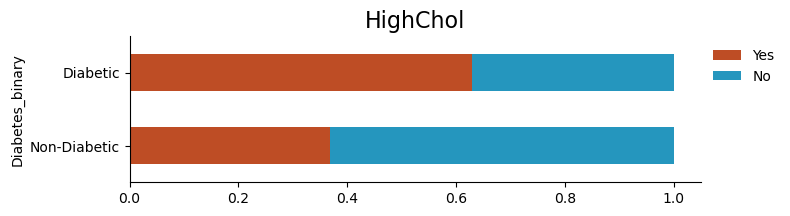

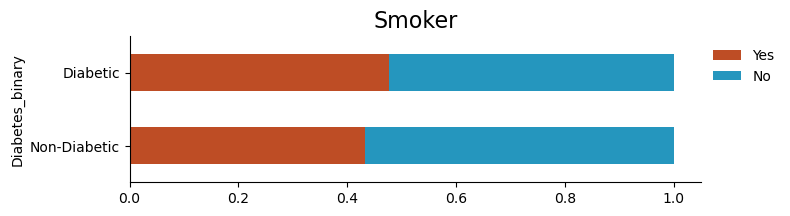

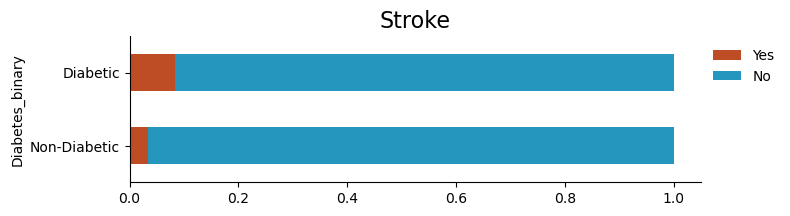

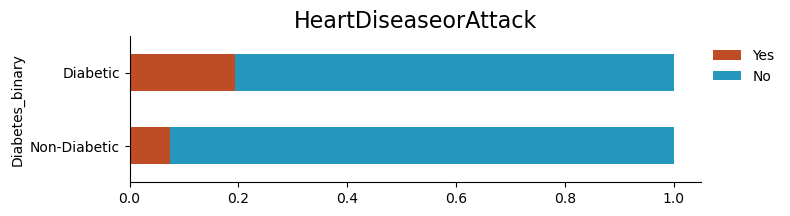

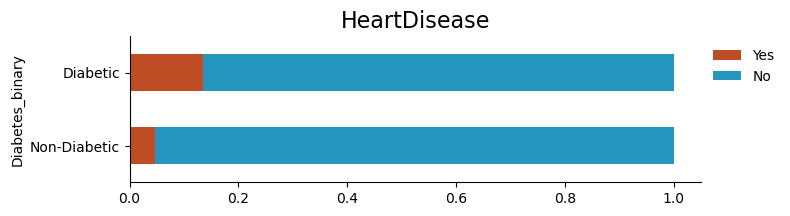

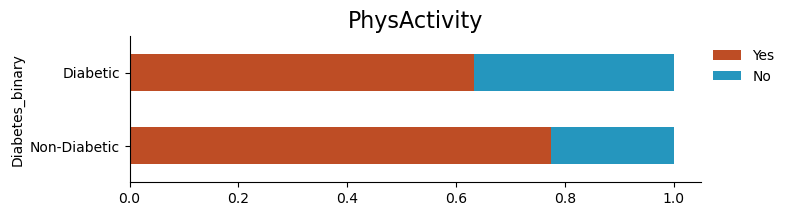

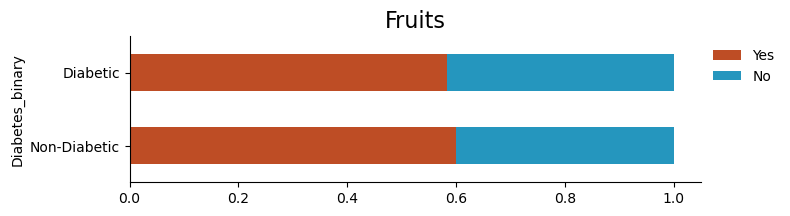

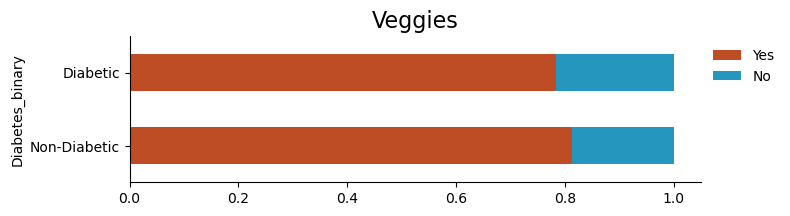

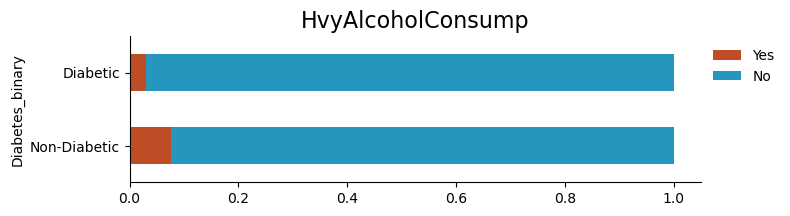

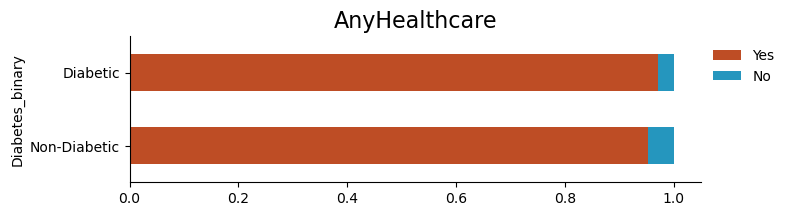

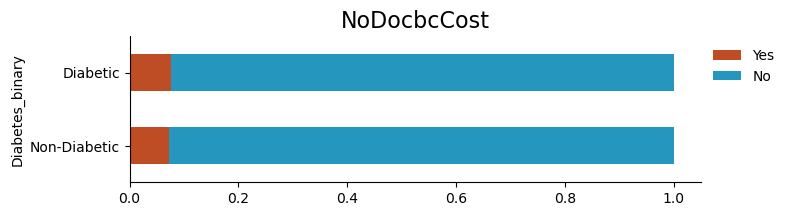

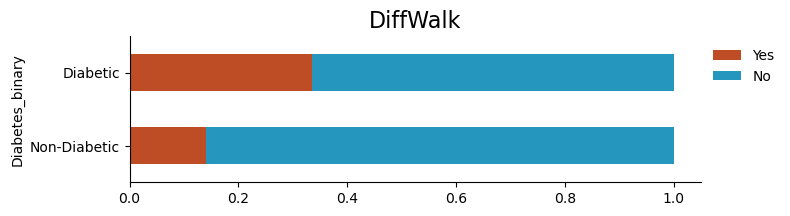

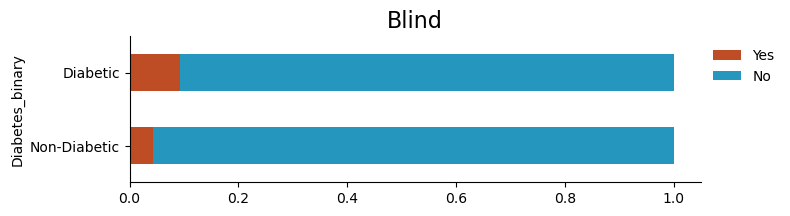

In [14]:
for var in bool_vars:
    analyse_cat(var)

Check with the binary variables.

In [15]:
brfss_binary.sample()

,Diabetes_binary,Age,Sex,Education,Income,HighBP,CholCheck,HighChol,BMI,Smoker,...,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Blind
104818,0,7,1,5,11,1,1,0,1,1,...,1,1,0,1,0,3,30,0,0,0


In [16]:
brfss_binary[num_vars].describe()

,Age,Education,Income,BMI,GenHlth,MentHlth,PhysHlth
count,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000
mean,7.839365,5.062525,6.717358,3.005519,2.581349,4.462533,4.264515
std,3.274868,0.966152,2.391078,0.917041,1.032153,8.281462,8.668586
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5.000000,4.000000,5.000000,2.000000,2.000000,0.000000,0.000000
50%,8.000000,5.000000,7.000000,3.000000,3.000000,0.000000,0.000000
75%,10.000000,6.000000,8.000000,4.000000,3.000000,5.000000,3.000000
max,13.000000,6.000000,11.000000,4.000000,5.000000,30.000000,30.000000


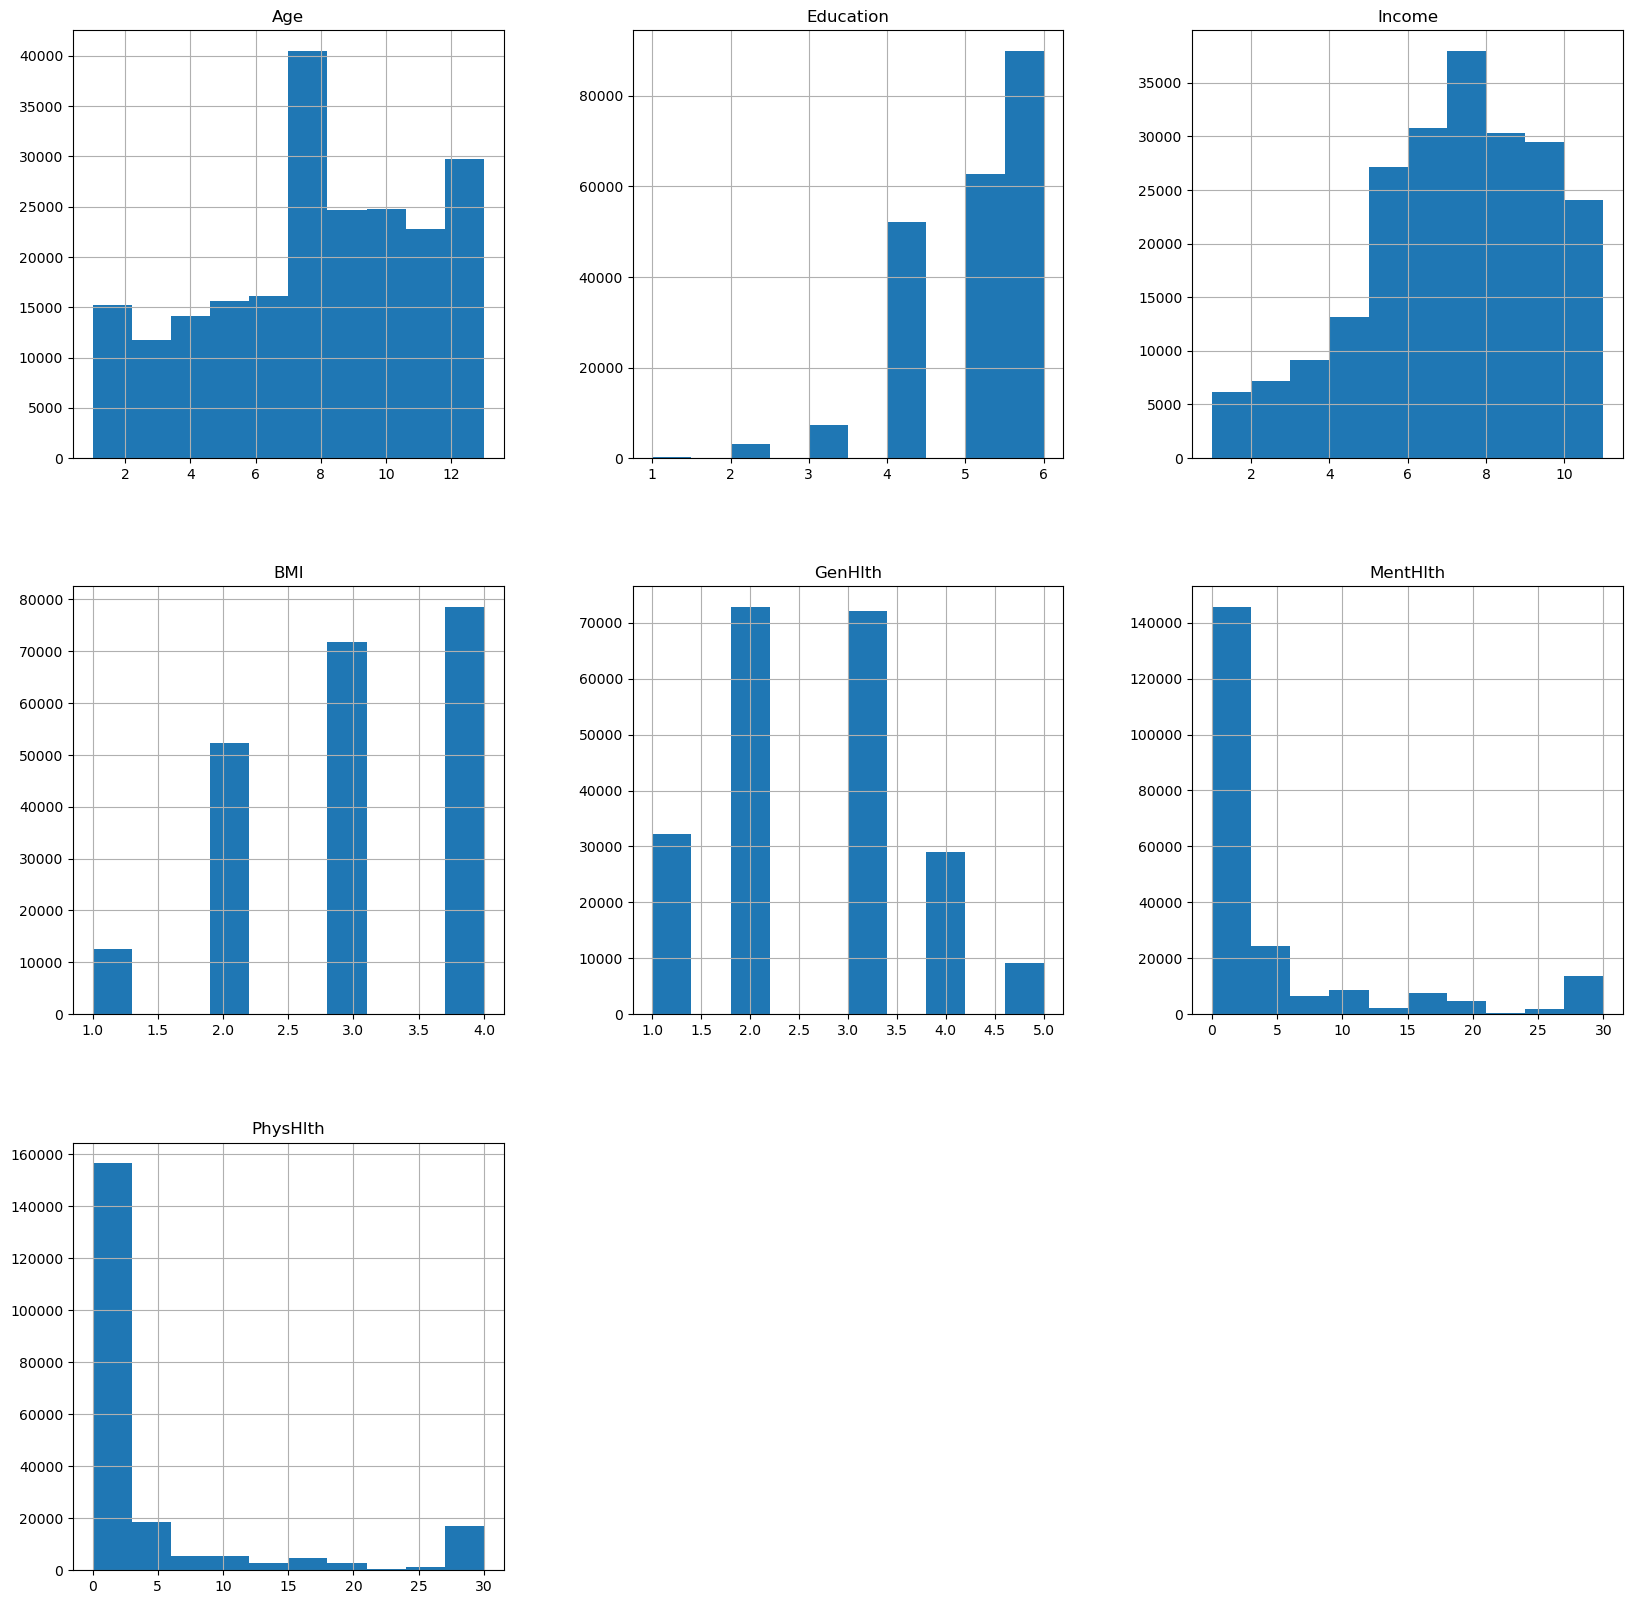

In [17]:
brfss_binary[num_vars].hist(figsize=(20,20));

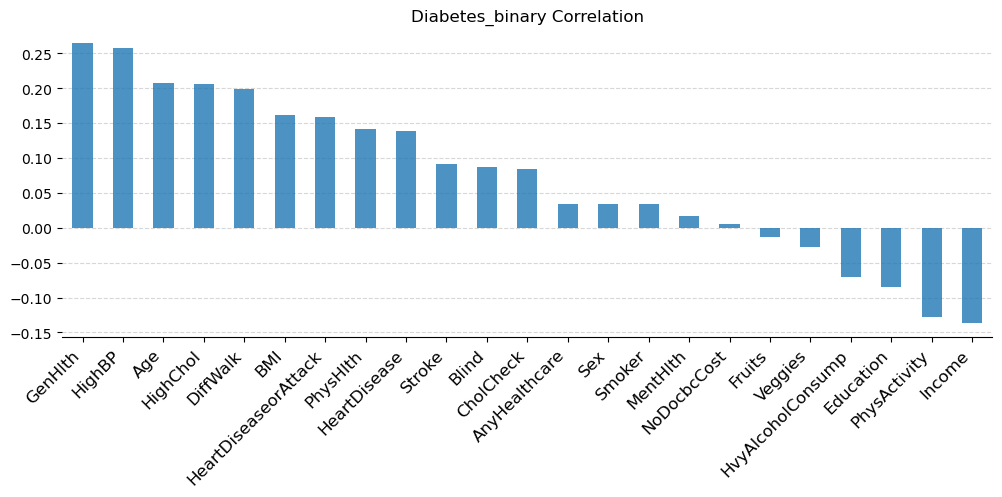

In [18]:
(brfss_binary.drop('Diabetes_binary', axis=1)
   .corrwith(brfss_binary.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Diabetes_binary Correlation", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=12);

**Diabetes_binary's relation with other columns Through bar Graph Result:**

1. AnyHealthcare,Sex,Smoker,MentHlth,NoDocbcCost,Fruits and Veggies are least correlated with Diabetes_binary.

2. GenHlth,HighBP,Age,DiffWalk,HighChol ,HeartDiseaseorAttack, BMI ,HeartDiseaseor,PhysHlth, Stroke, Blind,CholCheck,HvyAlcoholconsump , Education ,PhysActivity and Income have a significant correlation with Diabetes_binary.

### GenHlth VS Diabetes_binary

Based on the metadata from the BRFSS 2021 codebook, the dataset reveals that participants were requested to assess their overall health status using a scale ranging from 1 to 5, where:

* 1 = Excellent
* 2 = very good
* 3 = good
* 4 = fair
* 5 = poor

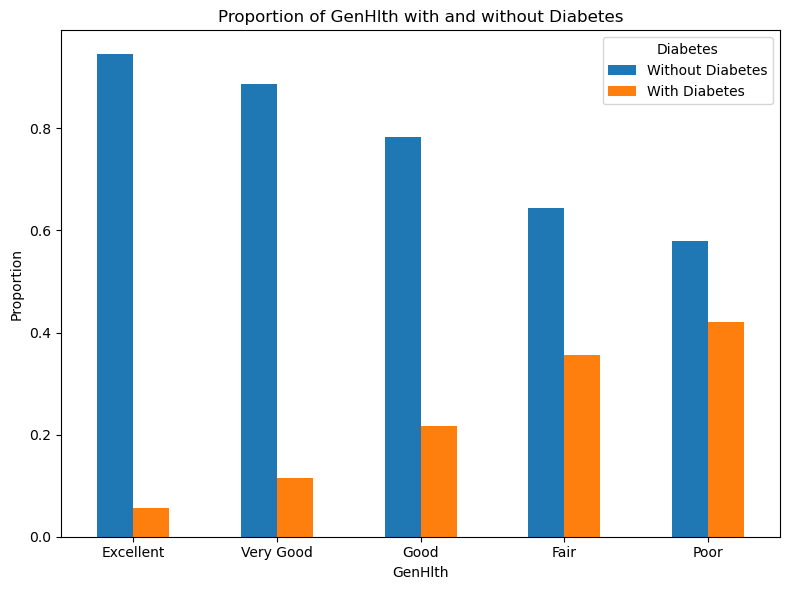

In [19]:
# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('GenHlth')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)

# Map DiffWalk categories to their corresponding labels
labels = {
    1: 'Excellent',
    2: 'Very Good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor'
}
proportion.rename(index=labels, inplace=True)

# Plot the grouped bar chart
ax = proportion.plot(kind='bar', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('GenHlth')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of GenHlth with and without Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


We can see from this bar chart,individuals with diabetes perceive a significantly lower level of well-being compared to those without the condition.

### HighBP VS Diabetes_binary

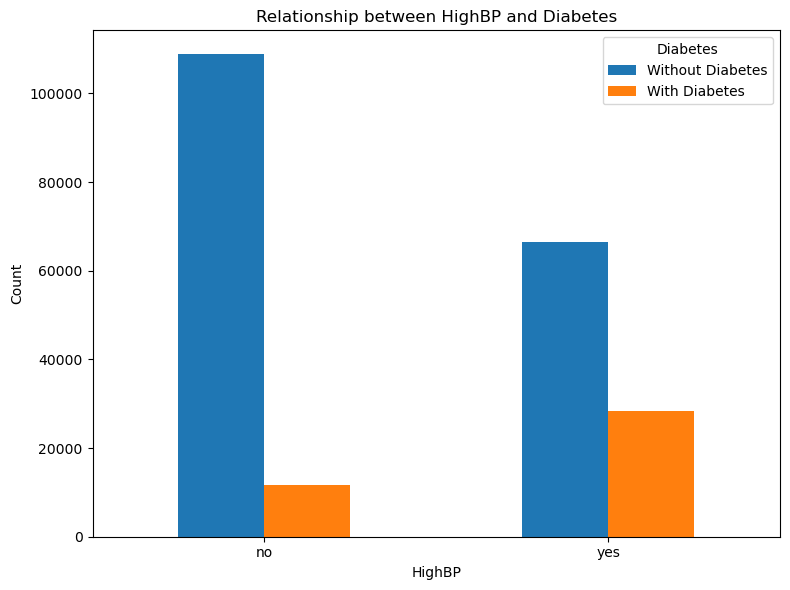

In [20]:
# Count the occurrences of each Diabetes_binary category for each GenHlth value
counts = brfss_binary.groupby(['HighBP', 'Diabetes_binary']).size().unstack()

# Map GenHlth categories to their corresponding labels
HighBP_labels = {
    0: 'no',
    1: 'yes'
}
counts.rename(index=HighBP_labels, inplace=True)

# Plot the grouped bar chart
ax = counts.plot(kind='bar', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('HighBP')

# Set the y-axis label
ax.set_ylabel('Count')

# Set the title
ax.set_title('Relationship between HighBP and Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

The analysis conducted suggests a notable correlation between individuals diagnosed with Diabetes and a higher prevalence of hypertension compared to those without the condition. Specifically, over 70% of individuals with diabetes were found to also have coexisting hypertension.

### Age VS Diabetes_binary

BRFSS 2021 codebook explains that is patient age classification with 5 year increments, where:

* 1 = 18-24 years old
* 2 = 25-29 years old
* 3 = 30-34 years old
* 4 = 35-39 years old
* 5 = 40-44 years old
* 6 = 45-49 years old
* 7 = 50-54 years old
* 8 = 55-59 years old
* 9 = 60-64 years old
* 10 = 65-69 years old
* 11 = 70-74 years old
* 12 = 75-79 years old
* 13 = 80 years and older

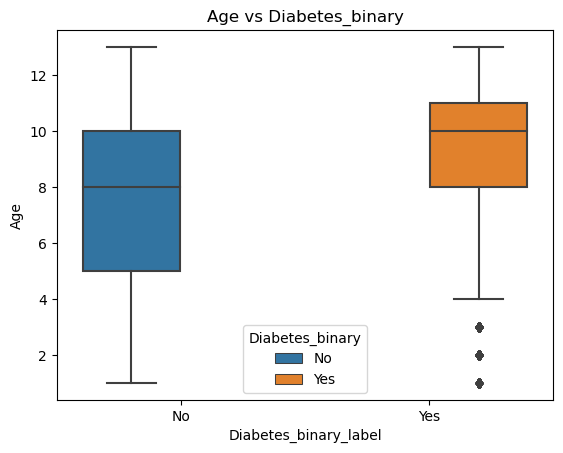

In [21]:
# Mapping the values of 'Diabetes_binary' to labels
brfss_binary['Diabetes_binary_label'] = brfss_binary['Diabetes_binary'].map({0: 'No', 1: 'Yes'})

# Plotting the boxplot
sns.boxplot(x='Diabetes_binary_label', y='Age', data=brfss_binary, hue='Diabetes_binary_label')

plt.title('Age vs Diabetes_binary')
plt.legend(title='Diabetes_binary')
plt.show()



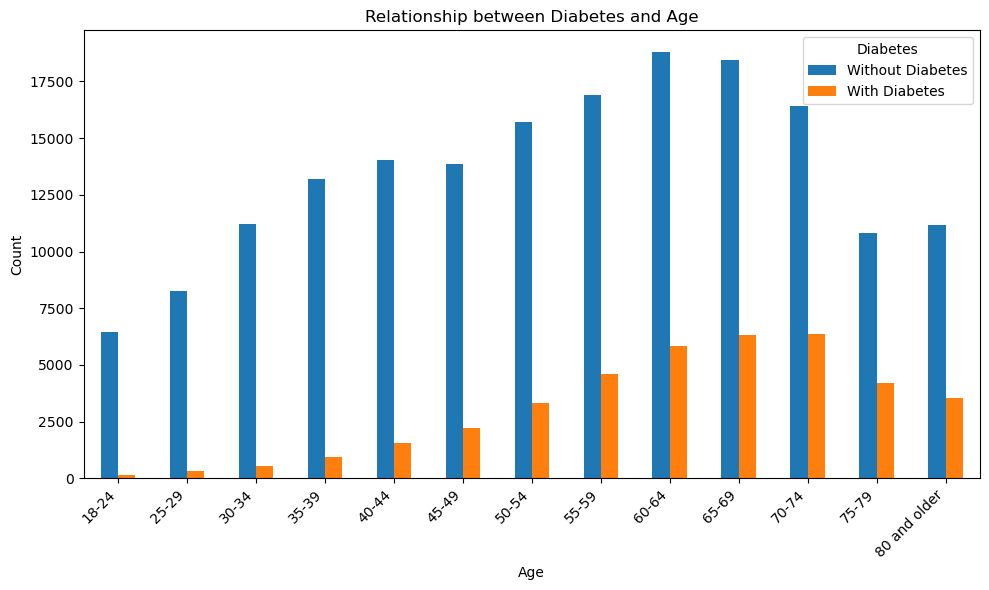

In [24]:
# Count the occurrences of each Diabetes_binary category for each age value
counts = brfss_binary.groupby(['Age', 'Diabetes_binary']).size().unstack()

# Map age categories to their corresponding labels
age_labels = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80 and older'
}
counts.rename(index=age_labels, inplace=True)

# Plot the grouped bar chart
ax = counts.plot(kind='bar', figsize=(10,6))

# Set the x-axis label
ax.set_xlabel('Age')

# Set the y-axis label
ax.set_ylabel('Count')

# Set the title
ax.set_title('Relationship between Diabetes and Age')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the legend
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


Base on the above dataset analysis, there was a notable concentration of individuals diagnosed with Diabetes between the ages of 50 to 74 years, in contrast to those without the condition.

### DiffWalk VS Diabetes_binary

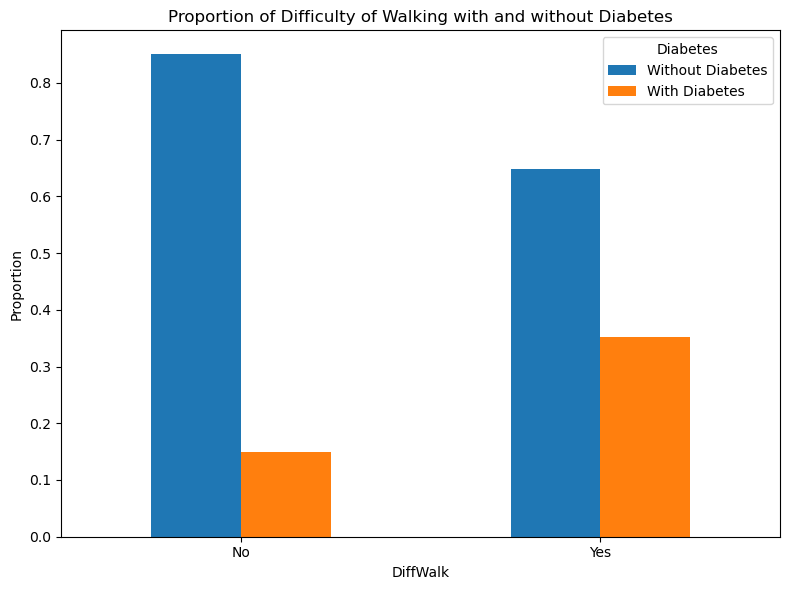

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('DiffWalk')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)

# Map DiffWalk categories to their corresponding labels
diffwalk_labels = {
    0: 'No',
    1: 'Yes'
}
proportion.rename(index=diffwalk_labels, inplace=True)

# Plot the grouped bar chart
ax = proportion.plot(kind='bar', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('DiffWalk')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of Difficulty of Walking with and without Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


### HighChol VS Diabetes_binary

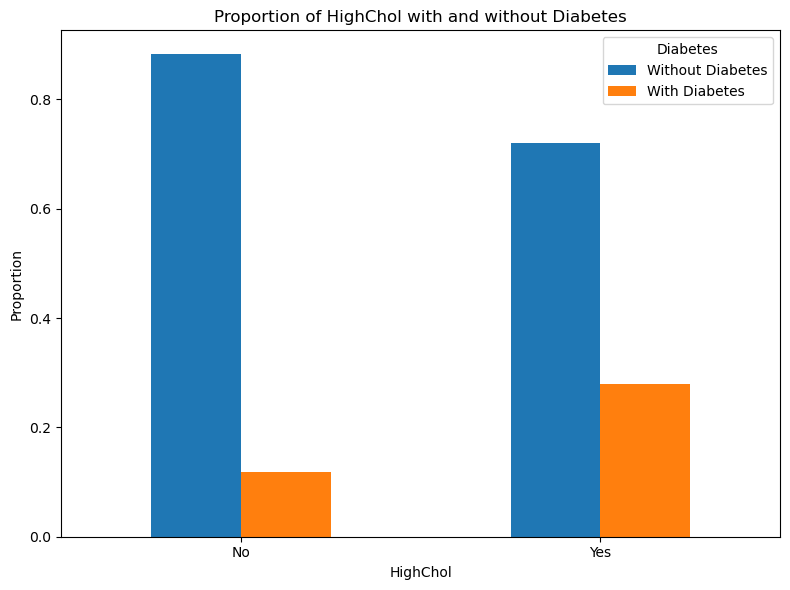

In [26]:
# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('HighChol')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)

# Map DiffWalk categories to their corresponding labels
labels = {
    0: 'No',
    1: 'Yes'
}
proportion.rename(index=labels, inplace=True)

# Plot the grouped bar chart
ax = proportion.plot(kind='bar', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('HighChol')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of HighChol with and without Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly higher cholesterol compared to those without the condition.

### HeartDiseaseorAttack VS Diabetes_binary

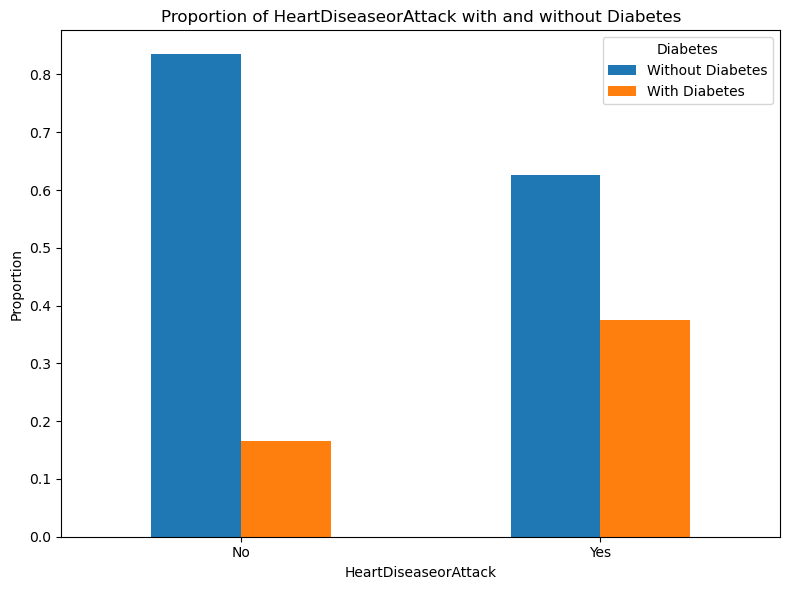

In [27]:
# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('HeartDiseaseorAttack')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)

# Map DiffWalk categories to their corresponding labels
labels = {
    0: 'No',
    1: 'Yes'
}
proportion.rename(index=labels, inplace=True)

# Plot the grouped bar chart
ax = proportion.plot(kind='bar', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('HeartDiseaseorAttack')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of HeartDiseaseorAttack with and without Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


The chart above indicates that individuals diagnosed with Diabetes exhibit a significantly cardiac conditions increase compared to those without the condition.

### BMI VS Diabetes_binary

#### According with CDC BRFSS 2021 codebook, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages.
- 1:Underweight 
- 2:Normal Weight
- 3:Overweight
- 4:Obese

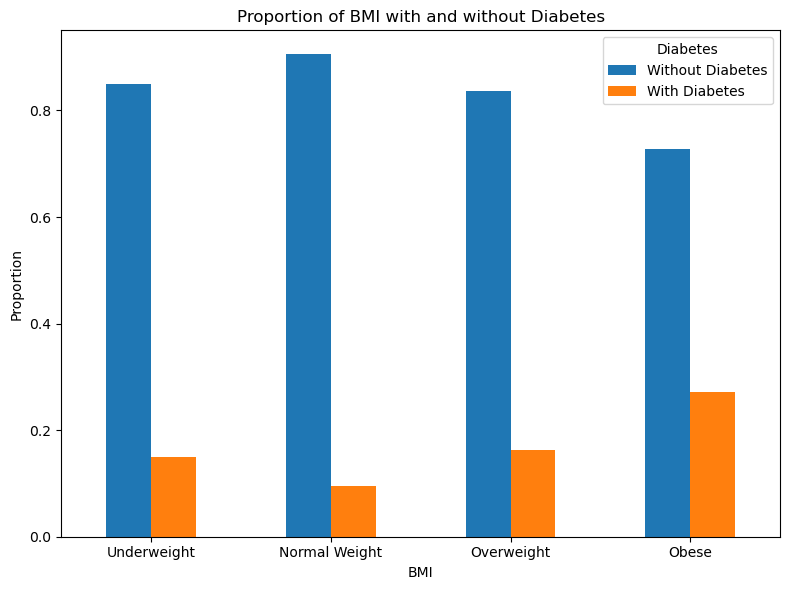

In [28]:
# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('BMI')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)

# Map DiffWalk categories to their corresponding labels
labels = {
    1: 'Underweight',
    2: 'Normal Weight',
    3: 'Overweight',
    4: 'Obese'
}
proportion.rename(index=labels, inplace=True)

# Plot the grouped bar chart
ax = proportion.plot(kind='bar', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('BMI')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of BMI with and without Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


The above chart analysis indicates that there is no significant correlation between BMI bins and the group without diabetes, whereas a strong positive correlation between diabetes and obesity was observed.

### PhysHlth VS Diabetes_binary

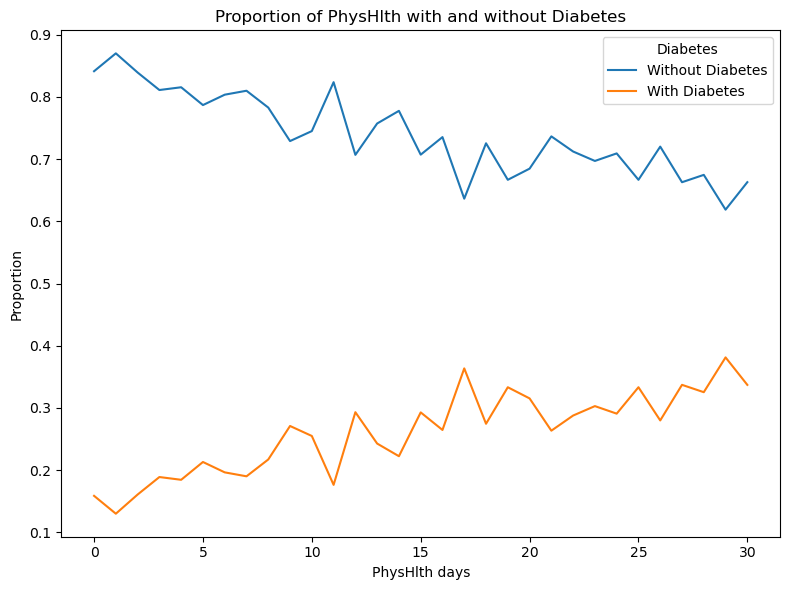

In [29]:
# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('PhysHlth')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)


# Plot the grouped bar chart
ax = proportion.plot(kind='line', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('PhysHlth days')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of PhysHlth with and without Diabetes')


# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly presence of days with some type of illness or injury compared to those without the condition

### Stroke VS Diabetes_binary

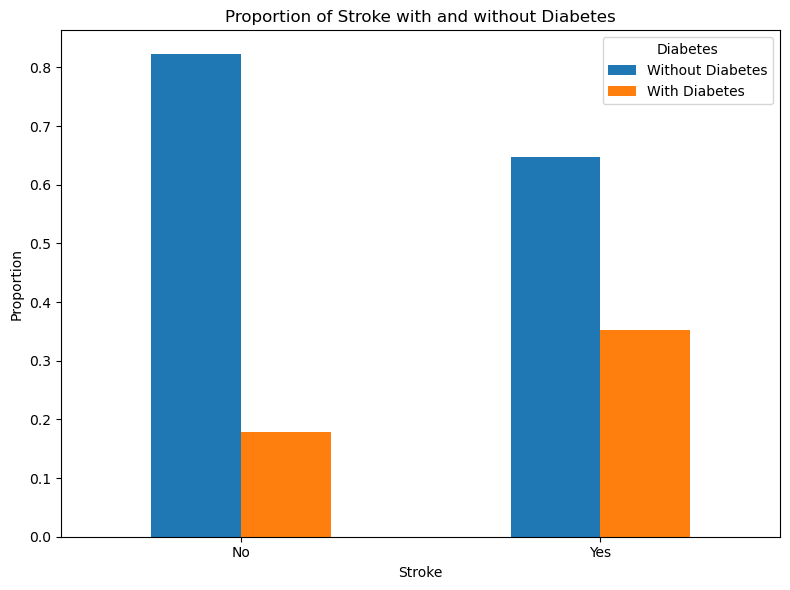

In [30]:
# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('Stroke')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)

# Map DiffWalk categories to their corresponding labels
labels = {
    0: 'No',
    1: 'Yes'
}
proportion.rename(index=labels, inplace=True)

# Plot the grouped bar chart
ax = proportion.plot(kind='bar', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('Stroke')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of Stroke with and without Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


The chart shows there is a sinificant higher quantity of strokes in diabetic group.

### Blind VS Diabetes_binary

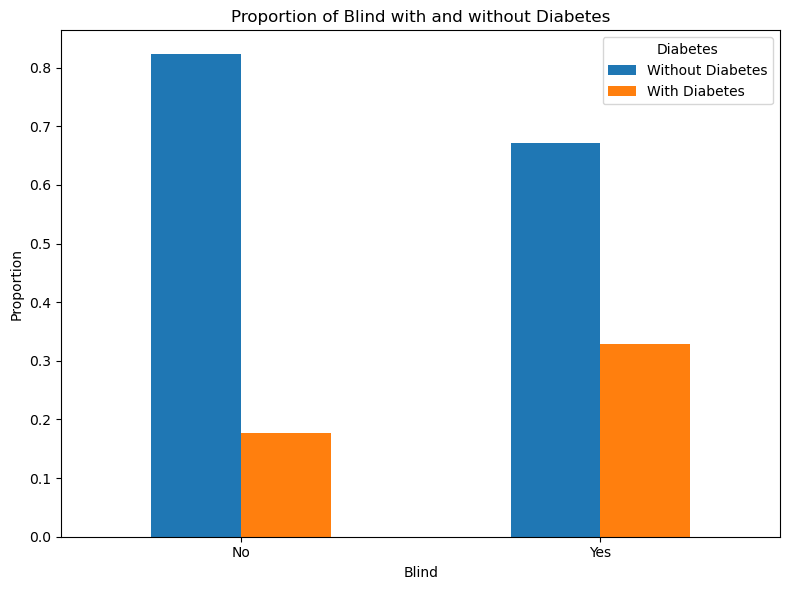

In [31]:
# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('Blind')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)

# Map DiffWalk categories to their corresponding labels
labels = {
    0: 'No',
    1: 'Yes'
}
proportion.rename(index=labels, inplace=True)

# Plot the grouped bar chart
ax = proportion.plot(kind='bar', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('Blind')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of Blind with and without Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


The chart shows there is a siginificant higher quantity of Blind in diabetic group.

### CholCheck VS Diabetes_binary

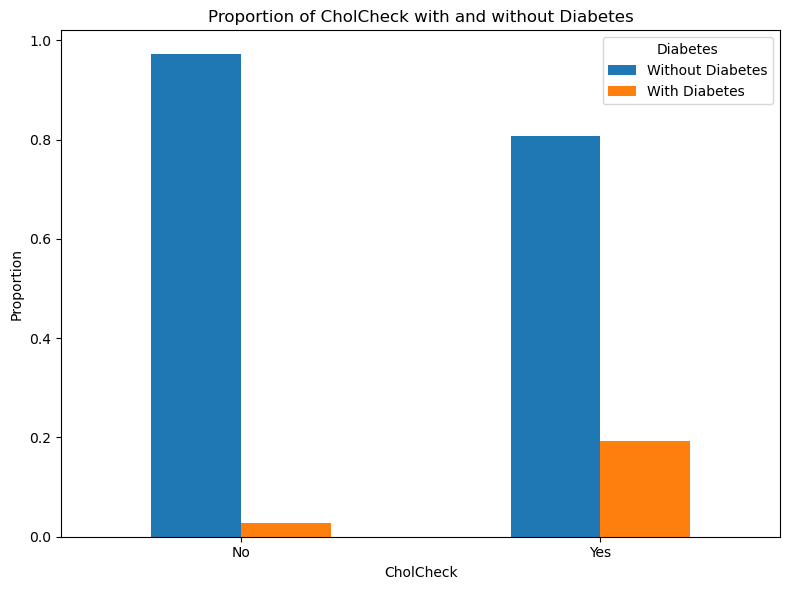

In [32]:
# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('CholCheck')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)

# Map DiffWalk categories to their corresponding labels
labels = {
    0: 'No',
    1: 'Yes'
}
proportion.rename(index=labels, inplace=True)

# Plot the grouped bar chart
ax = proportion.plot(kind='bar', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('CholCheck')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of CholCheck with and without Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


The chart shows there is a much higher quantity of CholCheck in diabetic group.

### Income VS  Diabetes_binary

MetaData explains that is patient Annual household income in dollar, where:

* 1 = <10,000
* 2 = 10,000–15,000
* 3 = 15,000–20,000 	
* 4 = 20,000–25,000
* 5 = 25,000–35,000
* 6 = 35,000–50,000
* 7 = 50,001–75,000
* 8 = 75,000-100,000 
* 9 = 100,000-150,000
* 10 = 150,000-200,000 
* 11 = >200,000 

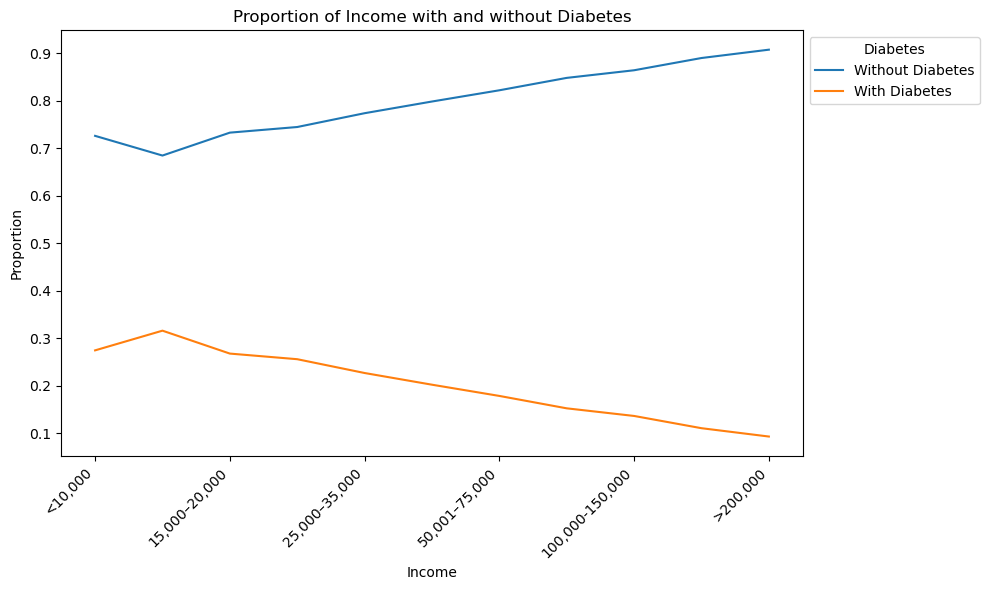

In [33]:
# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('Income')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)

# Map DiffWalk categories to their corresponding labels
labels = {
    1: '<10,000',
    2: '10,000–15,000',
    3: '15,000–20,000',
    4: '20,000–25,000',
    5: '25,000–35,000',
    6: '35,000–50,000',
    7: '50,001–75,000',
    8: '75,000-100,000',
    9: '100,000-150,000',
    10: '150,000-200,000',
    11: '>200,000'
}
proportion.rename(index=labels, inplace=True)

# Plot the grouped bar chart
ax = proportion.plot(kind='line', figsize=(10, 6))

# Set the x-axis label
ax.set_xlabel('Income')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of Income with and without Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(),  rotation=45, ha='right')

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


According to the dataset analysis, there was a notable concentration of individuals diagnosed with Diabetes in the lower income tiers in contrast to those without the condition.

### Education VS  Diabetes_binary

In [34]:
brfss_binary['Education'].unique()

array([4, 5, 6, 3, 2, 1], dtype=int64)

BRFSS 2021 codebook explains Education as fellows:

* 1 = Never attended school or only kindergarten
* 2 = Grades 1 through 8 (Elementary)
* 3 = Grades 9 through 11 (Some high school)
* 4 = Grade 12 or GED (High school graduate) 
* 5 = College 1 year to 3 years (Some college or technical school) 
* 6 = College 4 years or more (College graduate)

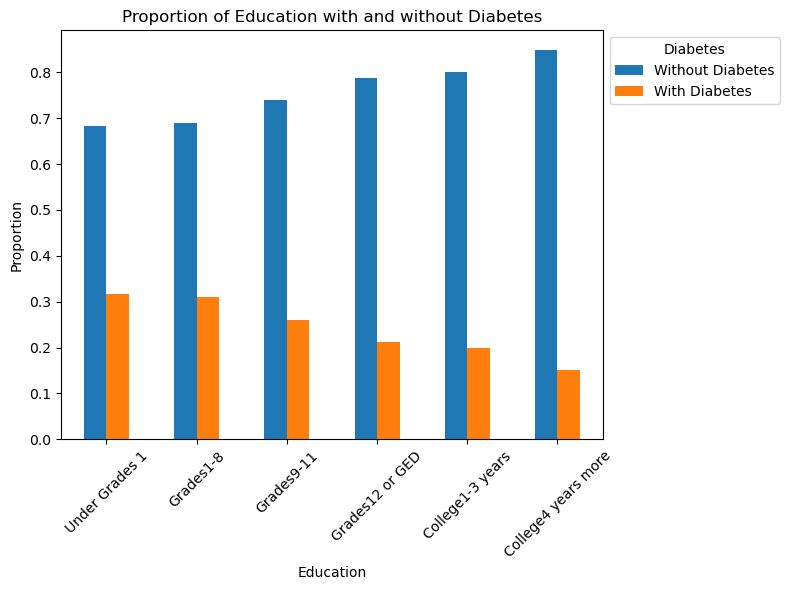

In [35]:
# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('Education')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)

# Map DiffWalk categories to their corresponding labels
labels = {
    1: 'Under Grades 1',
    2: 'Grades1-8',
    3: 'Grades9-11',
    4: 'Grades12 or GED',
    5: 'College1-3 years',
    6: 'College4 years more'
}
proportion.rename(index=labels, inplace=True)

# Plot the grouped bar chart
ax = proportion.plot(kind='bar', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('Education')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of Education with and without Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


The chart shows that there are fewer individuals with a college degree who have been diagnosed with diabetes compared to those without the condition.

### PhysActivity VS Diabetes_binary

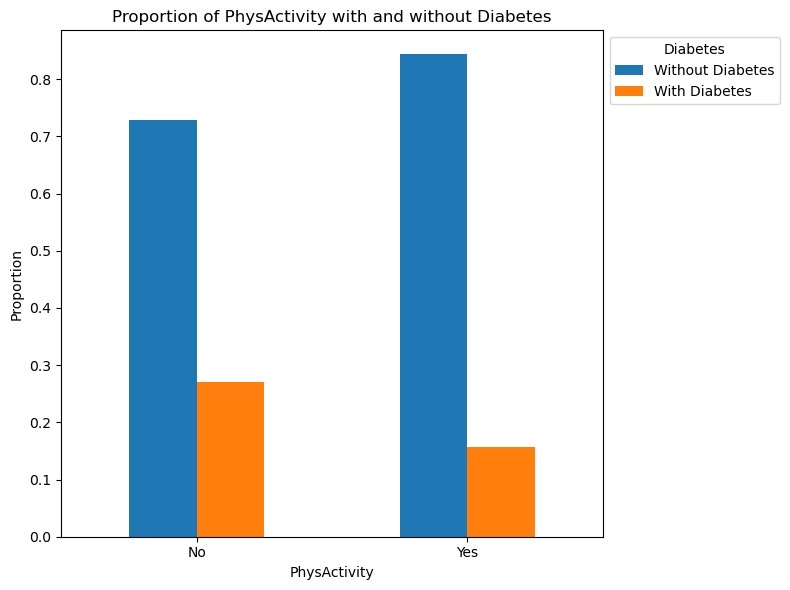

In [36]:
# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('PhysActivity')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)

# Map DiffWalk categories to their corresponding labels
labels = {
    0: 'No',
    1: 'Yes'
}
proportion.rename(index=labels, inplace=True)

# Plot the grouped bar chart
ax = proportion.plot(kind='bar', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('PhysActivity')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of PhysActivity with and without Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


The dataset analysis indicates that there are **more** individuals diagnosed with diabetes who report **lower** levels of physical activity, compared to those without the condition

### HvyAlcoholconsump VS Diabetes_binary

Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

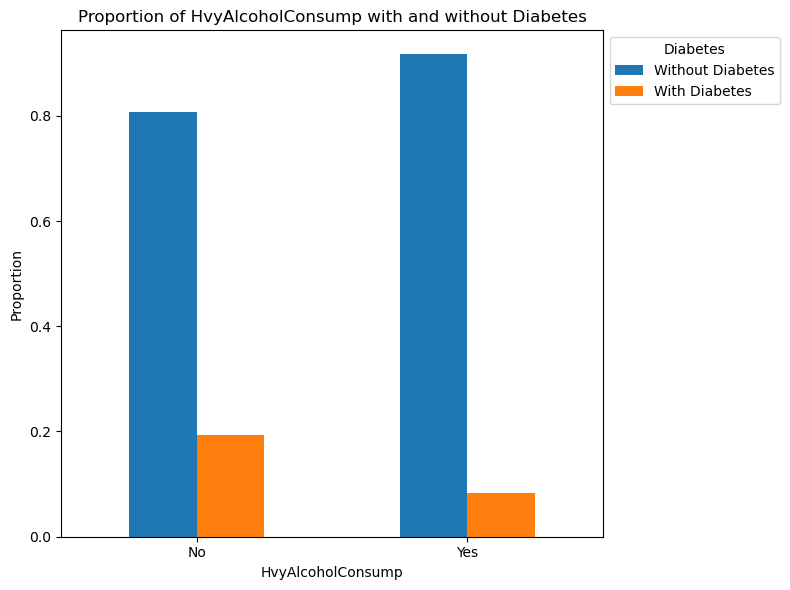

In [37]:
# Calculate the proportion of DiffWalk with and without diabetes
total_counts = brfss_binary.groupby('HvyAlcoholConsump')['Diabetes_binary'].value_counts().unstack()
proportion = total_counts.div(total_counts.sum(axis=1), axis=0)

# Map DiffWalk categories to their corresponding labels
labels = {
    0: 'No',
    1: 'Yes'
}
proportion.rename(index=labels, inplace=True)

# Plot the grouped bar chart
ax = proportion.plot(kind='bar', figsize=(8, 6))

# Set the x-axis label
ax.set_xlabel('HvyAlcoholConsump')

# Set the y-axis label
ax.set_ylabel('Proportion')

# Set the title
ax.set_title('Proportion of HvyAlcoholConsump with and without Diabetes')

# Set the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the legend with modified labels
legend_labels = {
    0: 'Without Diabetes',
    1: 'With Diabetes'
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, new_labels, title='Diabetes', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


There less heavy alcohol consume in the diabetic group.

## Findings

- Dataset Overview: The dataset consists of 215,258 rows and 24 columns, all of which are numeric. It contains information about various health indicators related to diabetes.

- Imbalanced Dataset: Out of the total population of 253,680 individuals, 213,703 are healthy, 35,346 have diabetes, and 4,631 are in the pre-diabetic phase. The dataset is imbalanced, with a higher proportion of healthy individuals.

- Least Correlated Variables: Variables such as AnyHealthcare, Sex, Smoker, MentHlth, NoDocbcCost, and Fruits and Veggies show the least correlation with the diabetes status.

- Significant Correlations: Variables including GenHlth, HighBP, Age, DiffWalk, HighChol, HeartDiseaseorAttack, BMI, PhysHlth, Stroke, Blind, CholCheck, HvyAlcoholconsump, Education, PhysActivity, and Income exhibit significant correlations with diabetes status.

- Perception of Well-being: Individuals with diabetes perceive a significantly lower level of well-being compared to those without the condition. This is evident from the bar chart analysis.

- Hypertension and Diabetes: There is a notable correlation between diabetes and a higher prevalence of hypertension. Over 70% of individuals with diabetes also have coexisting hypertension.

- Age and Diabetes: The dataset indicates a concentration of individuals diagnosed with diabetes in the age group of 50 to 74 years, compared to those without the condition.

- Cholesterol and Diabetes: Individuals diagnosed with diabetes exhibit significantly higher cholesterol levels compared to those without the condition.

- Cardiac Conditions and Diabetes: The analysis shows a higher incidence of cardiac conditions in individuals diagnosed with diabetes compared to those without the condition.

- BMI and Diabetes: There is a strong positive correlation between diabetes and obesity. The analysis indicates that individuals with diabetes have a higher prevalence of obesity.

- Presence of Illness or Injury: Individuals diagnosed with diabetes experience a higher presence of days with illness or injury compared to those without the condition.

- Strokes and Diabetes: The chart reveals a slightly higher occurrence of strokes in the diabetic group.

- Blindness and Diabetes: The analysis shows a slightly higher occurrence of blindness in individuals with diabetes.

- Cholesterol Check and Diabetes: The chart indicates a slightly higher frequency of cholesterol checks in individuals with diabetes.

- Income and Diabetes: There is a notable concentration of individuals diagnosed with diabetes in lower income tiers compared to those without the condition.

- Education and Diabetes: Individuals with a college degree have a lower prevalence of diabetes compared to those without a college degree.

- Physical Activity and Diabetes: The dataset analysis indicates that individuals diagnosed with diabetes report lower levels of physical activity compared to those without the condition.

- Alcohol Consumption and Diabetes: The analysis suggests that there is less heavy alcohol consumption among individuals with diabete

## Conclusion

1.The dataset analysis highlights the significant correlations between various health indicators and diabetes status. These findings can be used to identify potential risk factors and prioritize preventive measures.

2.The imbalanced nature of the dataset, with a higher proportion of healthy individuals, needs to be addressed when modeling and analyzing the data to avoid biased results.

3.Individuals with diabetes perceive a lower level of well-being, indicating the need for comprehensive support and management strategies to improve their quality of life.

4.The strong correlation between diabetes and hypertension emphasizes the importance of integrated care approaches targeting both conditions for effective management and prevention.

5.The concentration of individuals diagnosed with diabetes in the age group of 50 to 74 years suggests the need for targeted screening and intervention strategies for this age range.

6.The higher cholesterol levels and incidence of cardiac conditions among individuals with diabetes underline.